In [1]:
import sklearn
sklearn.__version__

'0.24.0'

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
x = mnist.data
y = mnist.target

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
>>> X, y = mnist['data'], mnist['target']
>>> X.shape

(70000, 784)

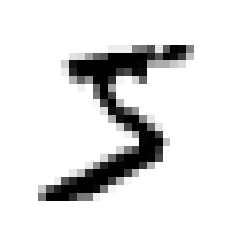

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X.to_numpy()[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = 'binary')
plt.axis('off')
plt.show()

In [6]:
import numpy as np
y = y.astype(np.uint8)

In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [8]:
y_train_5 = (y_train ==5)
y_test_5 = (y_test ==5)

In [9]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)


SGDClassifier(random_state=42)

In [10]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [11]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [12]:
>>> never_5_clf = Never5Classifier()
>>> cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

In [13]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [14]:
from sklearn.metrics import confusion_matrix
>>> confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [15]:
from sklearn.metrics import precision_score, recall_score
>>> precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [16]:
>>> recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [17]:
from sklearn.metrics import f1_score
>>> f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [18]:
>>> y_scores = sgd_clf.decision_function([some_digit])
>>> y_scores

array([2164.22030239])

In [19]:
>>> threshold = 0
>>> y_some_digit_pred = (y_scores > threshold)
>>> y_some_digit_pred

array([ True])

In [20]:
>>> threshold = 8000
>>> y_some_digit_pred = (y_scores > threshold)
>>> y_some_digit_pred

array([False])

In [21]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

In [22]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [23]:
def ppprvs(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precyzja')
    plt.plot(thresholds, recalls[:-1], 'g--', label='Pełność')
    plt.grid(True)
    _ = plt.legend()

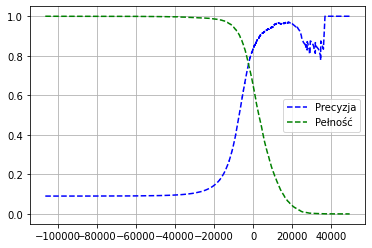

In [24]:
ppprvs(precisions, recalls, thresholds)
plt.show()

In [25]:
threshold_90_p = thresholds[np.argmax(precisions >= 0.90)]

In [26]:
y_train_pred_90 = (y_scores > threshold_90_p )

In [28]:
>>> recall_score(y_train_5, y_train_pred_90)

0.47980077476480354

In [29]:
>>> precision_score(y_train_5, y_train_pred_90)

0.9

In [30]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

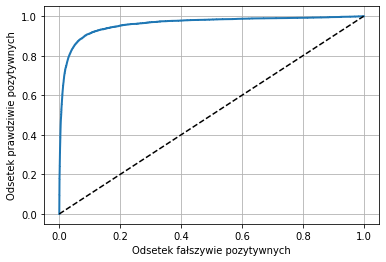

In [32]:
def prc(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.grid(True)
    plt.xlabel('Odsetek fałszywie pozytywnych')
    plt.ylabel('Odsetek prawdziwie pozytywnych')
    
prc(fpr, tpr)
plt.show()

In [33]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [35]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

In [36]:
y_scores_forest = y_probas_forest[:, 1]
fpr_f, tpr_f, thresholds_f = roc_curve(y_train_5, y_scores_forest)

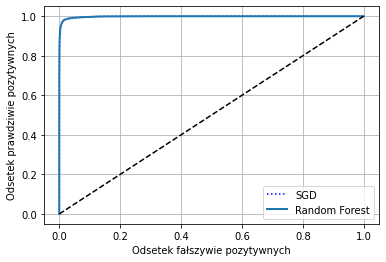

In [38]:
plt.plot(fpr_f, tpr_f, 'b:', label='SGD')
prc(fpr_f, tpr_f, 'Random Forest')
plt.legend(loc='lower right')
plt.show()

In [39]:
>>> roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [ ]:
from sklearn.svm import SVC
>>> svm_clf = SVC()
>>> svm_clf.fit(X_train, y_train)
>>> svm_clf.predict([some_digit])